# Car Selling Price Prediction


The dataset contains various attributes of cars, which will be used to predict their prices. There are total of 13 given columns as follows:

        1. name             : name of the car model
        2. year             : built year
        3. selling_price    : current selling price of the car
        4. km_driven        : total distance driven (in km)
        5. fuel             : fuel type used
        6. seller_type      : type of seller
        7. transmission     : transmission type (manual or automatic)
        8. owner            : the ownerership order (ith-hand)
        9. mileage          : the distance it can travel using a unit of fuel
        10. engine          : the size of engine
        11. max_power       : car's maximum power (rate of completing work in a timeframe)
        12. torque          : car's torque (capacity to do work)
        13. seats           : the number of seats avaialable

In this notebook, a selling_price prediction model will be created using other atrributes as features.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df = pd.read_csv('./data/Cars - Cars.csv')

In [3]:
# visualize the head and tail of dataframe
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
# dropping torque column
df.drop(['torque'], axis=1, inplace=True)

In [5]:
df.shape

(8128, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [7]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Because we are predicting *selling_price* which is a continuous label, we will try to implement a regressional model but there are only 4 applicable features so far.
We will inspect more on those string-type values to see the possiblity to encode them.

In [8]:
df.iloc[:,4:8].head()

,fuel,seller_type,transmission,owner
0,Diesel,Individual,Manual,First Owner
1,Diesel,Individual,Manual,Second Owner
2,Petrol,Individual,Manual,Third Owner
3,Diesel,Individual,Manual,First Owner
4,Petrol,Individual,Manual,First Owner


In [9]:
# counting the number of unique values of each columns above.

for col in df.iloc[:,4:8].columns:
    a = len(df[col].unique())
    print(f'The number of unique values of {col}: {a}')
    if a < 10:
        print(f'    Unique values of {col}: {df[col].unique()}')


The number of unique values of fuel: 4
    Unique values of fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']
The number of unique values of seller_type: 3
    Unique values of seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
The number of unique values of transmission: 2
    Unique values of transmission: ['Manual' 'Automatic']
The number of unique values of owner: 5
    Unique values of owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [10]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

*mileage*, *engine*, *max_power*, and *torque* can be converted to number if their units are the same and, therfore, neglected.

The *mileage* of natural gas-powered cars use different system from petrol-powered cars, so we will exclude natural gas-powered cars from the dataset. In addition, natural gas-powered cars have very few samples (95 cars).

In [11]:
df.drop(df[df['fuel'] == 'CNG'].index, inplace=True)
df.drop(df[df['fuel'] == 'LPG'].index, inplace=True)

In [12]:
# observing units in each columns
# considering if we have to convert some units or not

print(f'Unique ending of "mileage": {df["mileage"].str[-5:].unique()}')
print(f'Unique ending of "engine": {df["engine"].str[-3:].unique()}')
print(f'Unique ending of "max_power": {df["max_power"].str[-4:].unique()}')


Unique ending of "mileage": [' kmpl' nan]
Unique ending of "engine": [' CC' nan]
Unique ending of "max_power": [' bhp' nan '0']


In [13]:
# no unit conversion is needed
# stripping the unit and change those columns to proper numeric format

df['mileage'] = df['mileage'].str.strip(' kmpl')
df['engine'] = df['engine'].str.strip(' CC')
df['max_power'] = df['max_power'].str.strip(' bhp')

df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

In [14]:
# Extract brand from car's name and replace name column

df['name'] = list(df['name'].str.split(' ', n=1).str.get(0))
df.rename(columns={'name':'brand'}, inplace=True)

In [15]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### Feature Encoding

In [16]:
mp = dict()
owner_mapping = {'Test Drive Car': 5,
                 'First Owner': 1,
                 'Second Owner': 2,
                 'Third Owner': 3,
                 'Fourth & Above Owner': 4}
mp['owner_mapping'] = owner_mapping
df.replace({'owner': owner_mapping}, inplace=True)

In [17]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [19]:
# Import another library
from sklearn.preprocessing import LabelEncoder

# Encode 'fuel' and 'transmission' and print the encoding matrices

le_fuel = LabelEncoder()
le_fuel.fit(df['fuel'])
encoded, mapping = pd.Series(list(le_fuel.classes_)).factorize()
mp['fuel_mapping'] = mapping
print(pd.DataFrame({'': mapping, 'encoded value': encoded}).set_index(''))
df['fuel'] = le_fuel.transform(df['fuel'])

le_transmission = LabelEncoder()
le_transmission.fit(df['transmission'])
encoded, mapping = pd.Series(list(le_transmission.classes_)).factorize()
mp['transmission_mapping'] = mapping
print(pd.DataFrame({'': mapping, 'encoded value': encoded}).set_index(''))
df['transmission'] = le_transmission.transform(df['transmission'])

        encoded value
                     
Diesel              0
Petrol              1
           encoded value
                        
Automatic              0
Manual                 1


In [20]:
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True, dtype=int)

*seller_type* has 2 dummies columns. 
- 1 in *seller_type_Individual* -> Individual
- 1 in *seller_type_Trusmark Dealer* -> Trustmark Dealer
- 0 in **both** columns -> Dealer

In [21]:
df.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,Skoda,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,Honda,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,Hyundai,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,Maruti,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0


## Exploratory Data Analysis

<Axes: xlabel='owner', ylabel='selling_price'>

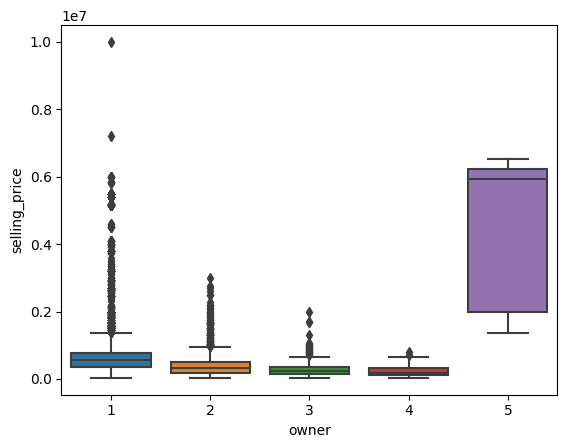

In [22]:
# Observe 'owner' effect on selling_price
sns.boxplot(data=df, x='owner', y='selling_price')

In [23]:
# The test drive car selling_price is extremely expensive. We will exclude them.

df = df[df['owner'] != 5]

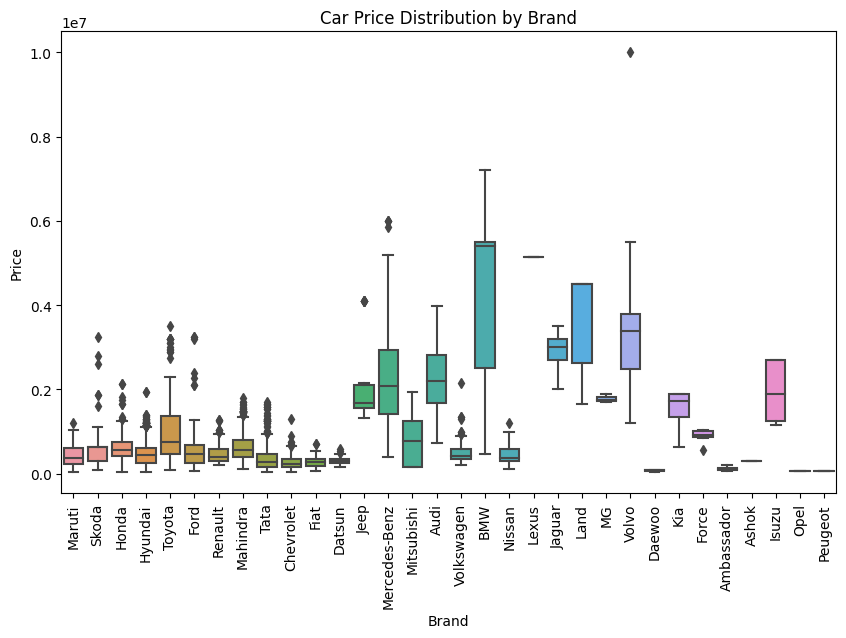

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting boxplot for car selling price by brand

plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='selling_price', data=df)
plt.title('Car Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Cars from each brand has different selling price range. The brand origin (continent of origin) shows that European cars generally have higher price than Asian and American cars (inspected leter in Feature Engineering section). But, the third boxplot shows that, among cars from the same origin, there is still some difference in pricing between brand.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         8028 non-null   object 
 1   year                          8028 non-null   int64  
 2   selling_price                 8028 non-null   int64  
 3   km_driven                     8028 non-null   int64  
 4   fuel                          8028 non-null   int32  
 5   transmission                  8028 non-null   int32  
 6   owner                         8028 non-null   int64  
 7   mileage                       7814 non-null   float64
 8   engine                        7814 non-null   float64
 9   max_power                     7820 non-null   float64
 10  seats                         7814 non-null   float64
 11  seller_type_Individual        8028 non-null   int32  
 12  seller_type_Trustmark Dealer  8028 non-null   int32  
dtypes: 

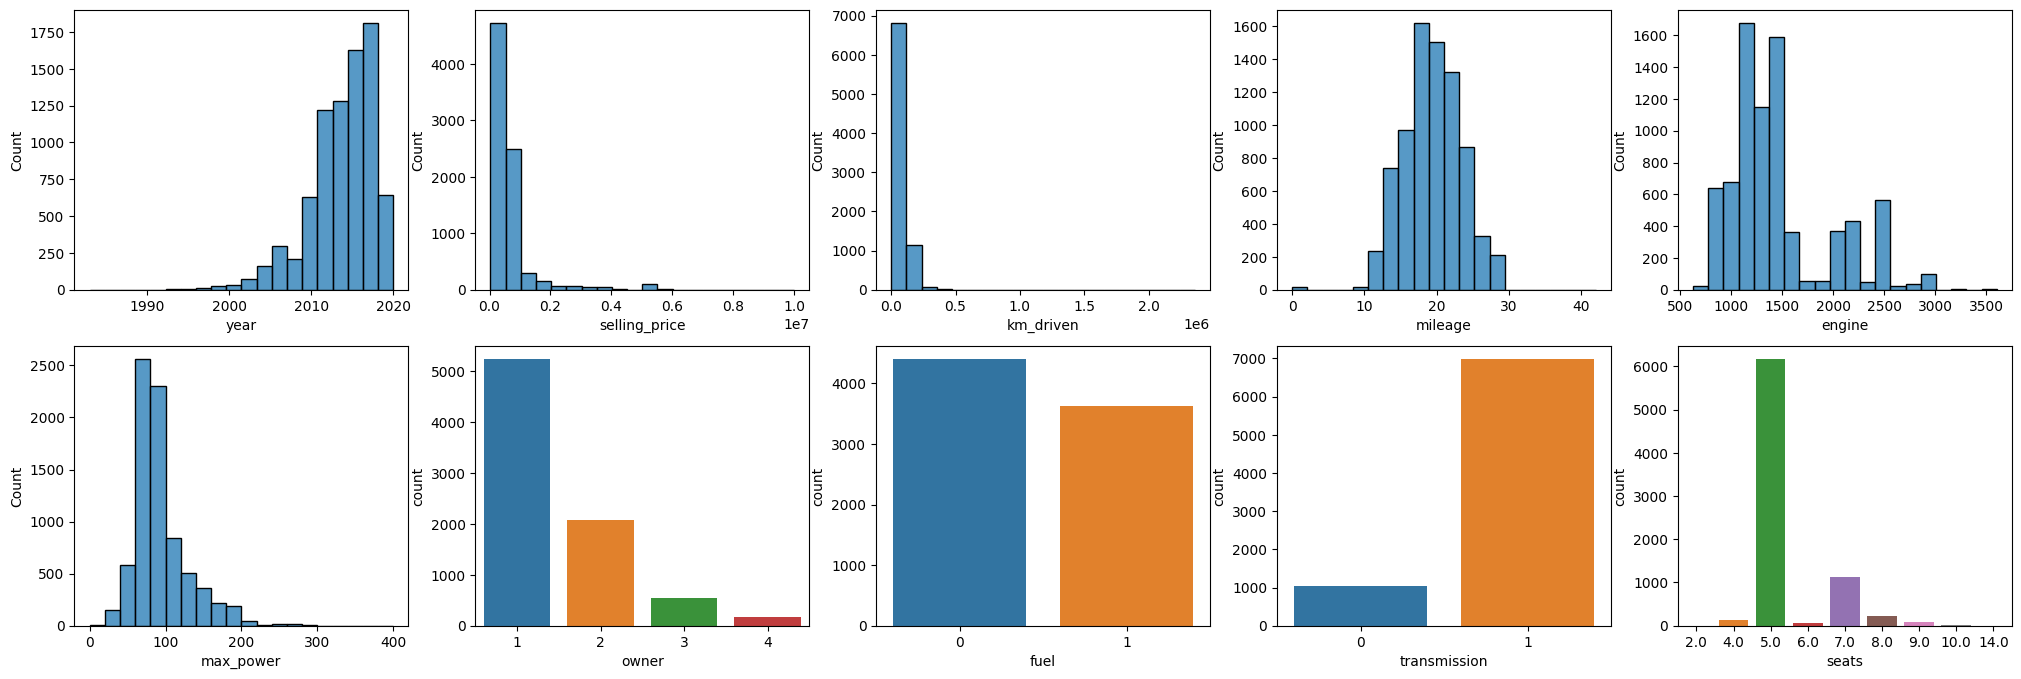

In [26]:
cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 
        'owner', 'fuel', 'transmission', 'seats']
fig, axi = plt.subplots(2, 5, figsize=(25,8))

for i,col in enumerate(cols):
    if i<6:
        sns.histplot(data=df, x=col, bins=20, ax=axi[i//5, i%5])
    else:
        sns.countplot(data=df, x=col, ax=axi[i//5, i%5])
          
plt.show()

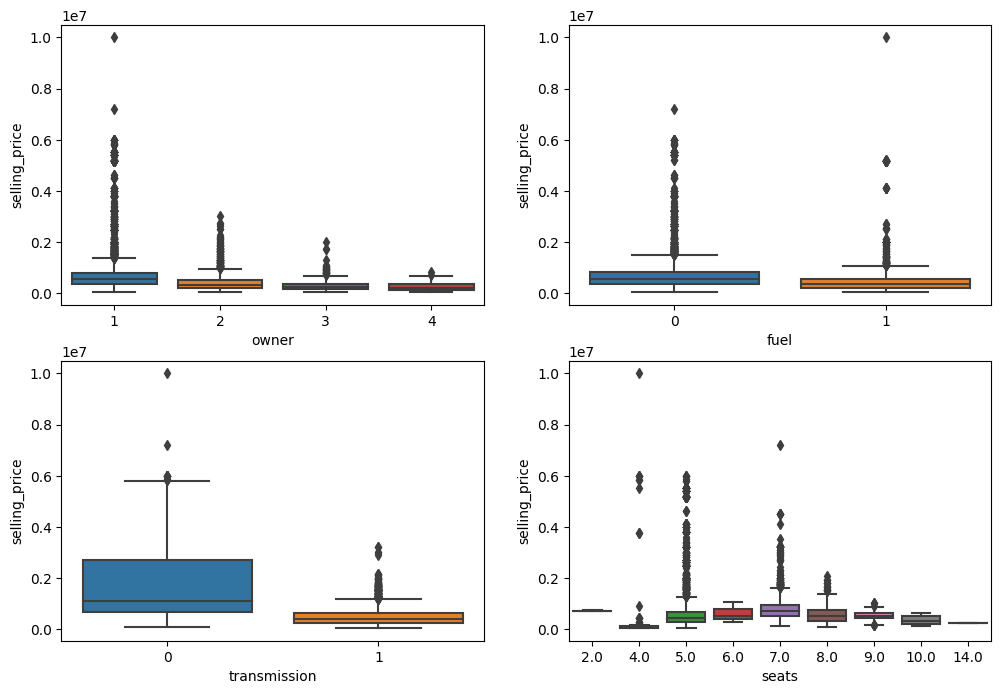

In [27]:
cols = ['owner', 'fuel', 'transmission', 'seats']
fig, axi = plt.subplots(2, 2, figsize=(12,8))

for i,col in enumerate(cols):
    sns.boxplot(data=df, x=col, y='selling_price', ax=axi[i//2, i%2])
          
plt.show()

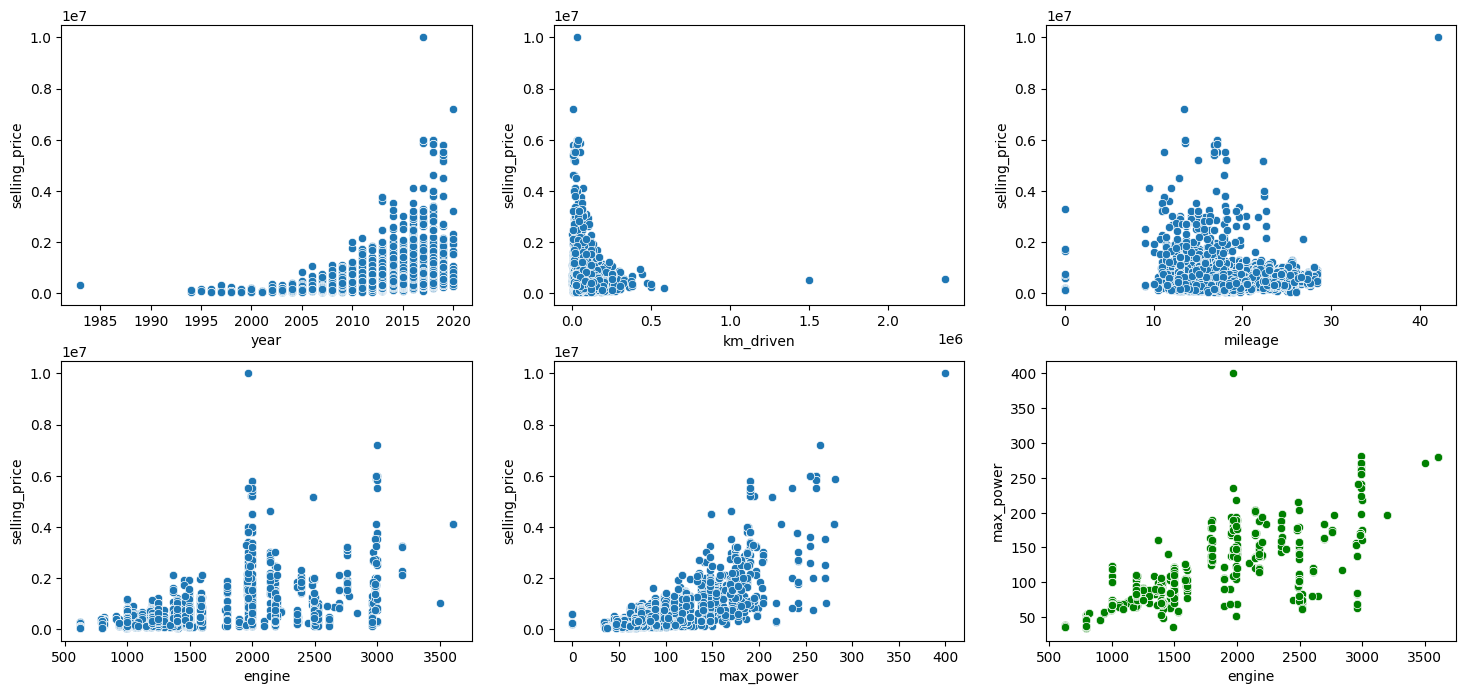

In [28]:
cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
fig, axi = plt.subplots(2, 3, figsize=(18,8))

for i,col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='selling_price', ax=axi[i//3,i%3])
sns.scatterplot(data=df, x='engine', y='max_power', ax=axi[1, 2], color='green')

plt.show()

It seems that 'mileage' will be reaaly bad for 'selling_price' prediction

On the other hand, 'engine' and 'max_power' seems to be correlated. They might be able to predict and fill each other values if it is unspecified or None. (spoiler alert: it provides no significant improvement on the model performance)

### Correlation Matrix

<Axes: >

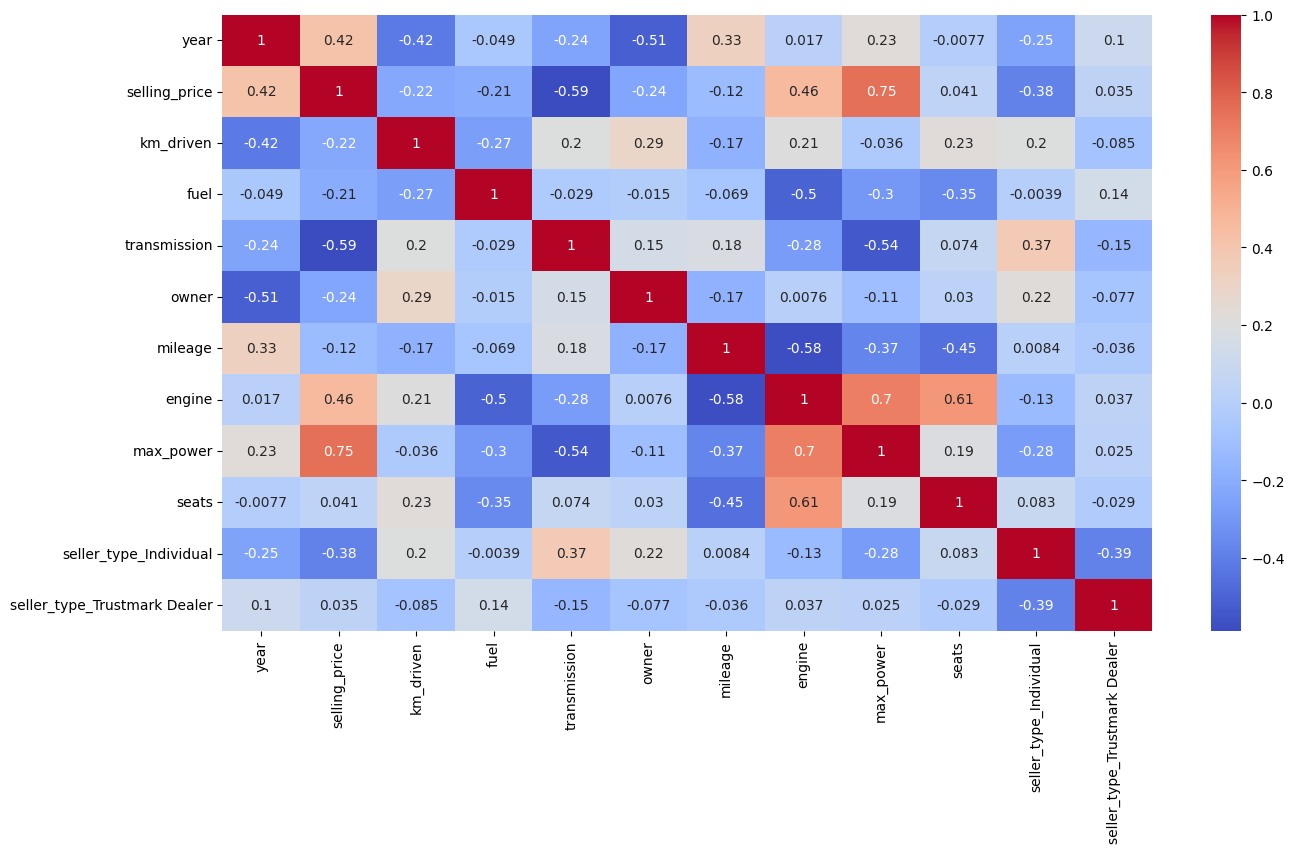

In [29]:
plt.figure(figsize = (15,8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap="coolwarm")

### Predictive Power Score Matrix

<Axes: xlabel='x', ylabel='y'>

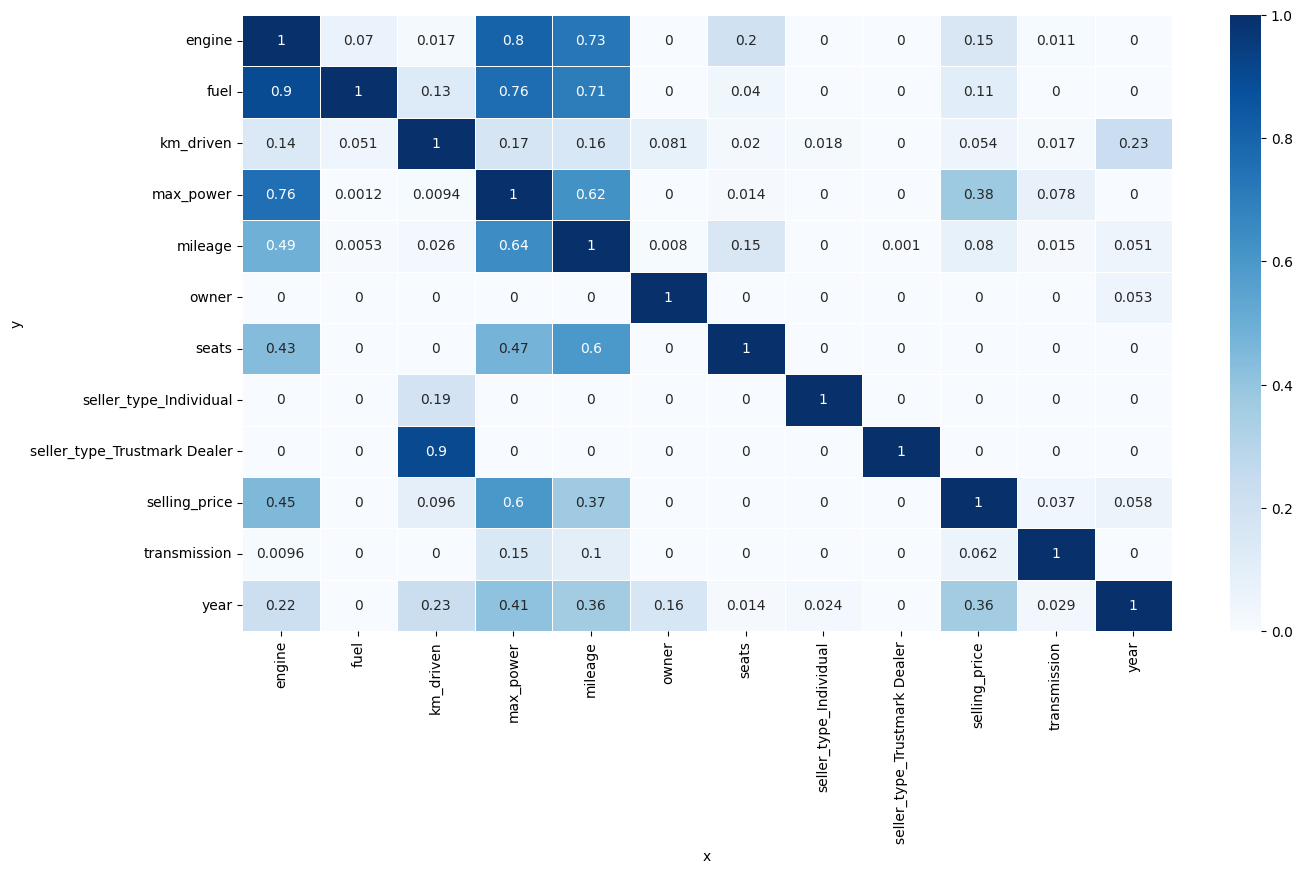

In [30]:
import ppscore as pps


matrix_df = pps.matrix(df.select_dtypes(exclude='object'))[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Feature Engineering

Below are the attempt to encode car brands into their respective continental origin.

The performance of the model is much worse than using one-hot encoding of car brands, so the section is commented out.
- I speculated that even among car brands from the same continent, there are too much difference in selling price.

In [31]:
# print(df['brand'].value_counts())
# print(df['brand'].unique())

In [32]:
# brand_mapping = {'Maruti': 'Japan',
#                  'Skoda': 'Czech Republic',
#                  'Honda': 'Japan',
#                  'Hyundai': 'South Korea',
#                  'Toyota': 'Japan',
#                  'Ford': 'United States',
#                  'Renault': 'France',
#                  'Mahindra': 'India',
#                  'Tata': 'India',
#                  'Chevrolet': 'United States',
#                  'Fiat': 'Italy',
#                  'Datsun': 'Japan',
#                  'Jeep': 'United States',
#                  'Mercedes-Benz': 'Germany',
#                  'Mitsubishi': 'Japan',
#                  'Audi': 'Germany',
#                  'Volkswagen': 'Germany',
#                  'BMW': 'Germany',
#                  'Nissan': 'Japan',
#                  'Lexus': 'Japan',
#                  'Jaguar': 'United Kingdom',
#                  'Land': 'United Kingdom',
#                  'MG': 'United Kingdom',
#                  'Volvo': 'Sweden',
#                  'Daewoo': 'South Korea',
#                  'Kia': 'South Korea',
#                  'Force': 'India',
#                  'Ambassador': 'United Kingdom',
#                  'Ashok': 'India',
#                  'Isuzu': 'Japan',
#                  'Opel': 'Germany',
#                  'Peugeot': 'France',
#                 }



In [33]:
# # creating brand_mapping from brand to continent of origin
# brand_mapping = {'Maruti': 'Asian',
#                  'Skoda': 'European',
#                  'Honda': 'Asian',
#                  'Hyundai': 'Asian',
#                  'Toyota': 'Asian',
#                  'Ford': 'United States',
#                  'Renault': 'European',
#                  'Mahindra': 'Asian',
#                  'Tata': 'Asian',
#                  'Chevrolet': 'United States',
#                  'Fiat': 'Asian',
#                  'Datsun': 'Asian',
#                  'Jeep': 'United States',
#                  'Mercedes-Benz': 'European',
#                  'Mitsubishi': 'Asian',
#                  'Audi': 'European',
#                  'Volkswagen': 'European',
#                  'BMW': 'European',
#                  'Nissan': 'Asian',
#                  'Lexus': 'Asian',
#                  'Jaguar': 'European',
#                  'Land': 'European',
#                  'MG': 'European',
#                  'Volvo': 'European',
#                  'Daewoo': 'Asian',
#                  'Kia': 'Asian',
#                  'Force': 'Asian',
#                  'Ambassador': 'European',
#                  'Ashok': 'Asian',
#                  'Isuzu': 'Asian',
#                  'Opel': 'European',
#                  'Peugeot': 'European',
#                 }

In [34]:
# # applying the mapping
# df['origin'] = df['brand'].map(brand_mapping)
# temp = pd.concat([temp, df['origin']], axis=1)
# df = pd.get_dummies(df, columns=['origin'], drop_first=True, dtype=int)

In [35]:
# # plotting boxplot for car selling price by brand
# brand_price_stats = df.groupby('origin')['selling_price'].describe()
# print(brand_price_stats)
# plt.figure(figsize=(8, 5))
# sns.boxplot(x='origin', y='selling_price', data=df)
# plt.title('Car Price Distribution by Continental Origin')
# plt.xlabel('Origin')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.show()

In [36]:
# # plotting boxplot for car selling price by brand
# plt.figure(figsize=(8, 5))
# sns.boxplot(x='brand', y='selling_price', data=df[df['origin'] == 'Asian'])
# plt.title('Car Price Distribution by Continental Origin')
# plt.xlabel('Brand')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.show()

Note that *origin* has 2 dummies columns. 
- 1 in *origin_European* -> European car
- 1 in *origin_United States* -> US car
- 0 in **both** columns -> Asian car

## Feature Selection

In [37]:
df.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,Skoda,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,Honda,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,Hyundai,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,Maruti,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0


In [38]:
# From correlation and ppscore map, we will drop several columns that potentially complicate the model rather than improving performances.

df.drop(['fuel','owner','mileage', 'km_driven', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'seats'], axis=1, inplace=True)

In [39]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         8028 non-null   object 
 1   year          8028 non-null   int64  
 2   transmission  8028 non-null   int32  
 3   engine        7814 non-null   float64
 4   max_power     7820 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 345.0+ KB


### Train Test Split

## Preprocessing

In [41]:
# Check Null values

X.isna().sum()

brand             0
year              0
transmission      0
engine          214
max_power       208
dtype: int64

In [42]:
y.isna().sum()

# no null in selling_price label

0

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Apply logarithmic scale on y to improve model stabiliy
y_train = np.log(y_train)

### Fill missing value

In [45]:
X

,brand,year,transmission,engine,max_power
0,Maruti,2014,1,1248.0,74.00
1,Skoda,2014,1,1498.0,103.52
2,Honda,2006,1,1497.0,78.00
3,Hyundai,2010,1,1396.0,90.00
4,Maruti,2007,1,1298.0,88.20
...,...,...,...,...,...
8123,Hyundai,2013,1,1197.0,82.85
8124,Hyundai,2007,1,1493.0,110.00
8125,Maruti,2009,1,1248.0,73.90
8126,Tata,2013,1,1396.0,70.00


In [46]:
mp

{'owner_mapping': {'Test Drive Car': 5,
  'First Owner': 1,
  'Second Owner': 2,
  'Third Owner': 3,
  'Fourth & Above Owner': 4},
 'fuel_mapping': Index(['Diesel', 'Petrol'], dtype='object'),
 'transmission_mapping': Index(['Automatic', 'Manual'], dtype='object')}

In [47]:
# sns.histplot(data=X_train, x='engine', bins=20, hue='fuel')

# Petrol fuel car's engine distribution is unimodal 
# Diesel fuel car's engine distribution is bimodal (roughly)

### Trying to Predict 'engine' with 'fuel' and 'origin' from Feature Engineering

In [49]:
# X[X['fuel']==0][X['origin_European']==1]

In [50]:
# fig, axi = plt.subplots(1, 3, figsize=(10,4))
          
# sns.histplot(data=X[X['fuel']==0][X['origin_United States']==0][X['origin_European']==0], x='engine', bins=20, ax=axi[0]) # Asian
# sns.histplot(data=X[X['fuel']==0][X['origin_United States']==1], x='engine', bins=20, ax=axi[1]) # US
# sns.histplot(data=X[X['fuel']==0][X['origin_European']==1], x='engine', bins=20, ax=axi[2]) # European
# plt.show()

# # There are differences in distribution of car's engine 

In [51]:
# fill_engine = dict()
# fill_engine['unknown origin'] = X[X['fuel']==0]['engine'].median() 
# fill_engine['Asian'] = X[X['fuel']==0][X['origin_United States']==0][X['origin_European']==0]['engine'].median()
# fill_engine['US'] = X[X['fuel']==0][X['origin_United States']==1]['engine'].median()
# fill_engine['European'] = X[X['fuel']==0][X['origin_European']==1]['engine'].median()
# fill_engine

### 

In [52]:
mp

{'owner_mapping': {'Test Drive Car': 5,
  'First Owner': 1,
  'Second Owner': 2,
  'Third Owner': 3,
  'Fourth & Above Owner': 4},
 'fuel_mapping': Index(['Diesel', 'Petrol'], dtype='object'),
 'transmission_mapping': Index(['Automatic', 'Manual'], dtype='object')}

In [53]:
# Fill missing 'engine' value

filling = dict()
filling['engine'] = X_train['engine'].median() 

In [54]:
X_train.isna().sum()

brand             0
year              0
transmission      0
engine          171
max_power       165
dtype: int64

In [55]:
X_train.shape

(6422, 5)

In [56]:
filling

{'engine': 1248.0}

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 2982 to 7366
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6422 non-null   object 
 1   year          6422 non-null   int64  
 2   transmission  6422 non-null   int32  
 3   engine        6251 non-null   float64
 4   max_power     6257 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 275.9+ KB


In [58]:
# Create other predictors filling matrices

for col in ['year', 'max_power']:
    filling[col] = X_train[col].median() 
for col in ['transmission']:
    filling[col] = X_train[col].mode()[0]

In [59]:
filling

{'engine': 1248.0, 'year': 2015.0, 'max_power': 82.85, 'transmission': 1}

In [60]:
# apply filling to X_train
for col in list(filling.keys()):
    X_train[col].fillna(filling[col], inplace=True)

In [61]:
# apply filling to X_test
for col in list(filling.keys()):
    X_test[col].fillna(filling[col], inplace=True)

In [62]:
# all NaN is filled
X_train

,brand,year,transmission,engine,max_power
2982,Renault,2016,1,799.0,53.30
2430,Maruti,2013,1,796.0,47.30
6294,Hyundai,2009,1,1248.0,82.85
6255,Tata,2018,1,2179.0,153.86
4253,Mitsubishi,1999,1,1998.0,68.00
...,...,...,...,...,...
5293,Hyundai,2013,1,1197.0,78.90
5461,Maruti,2016,1,998.0,67.04
865,Maruti,2015,1,1248.0,88.76
7701,Lexus,2019,0,2487.0,214.56


In [63]:
X_train.isna().sum()

brand           0
year            0
transmission    0
engine          0
max_power       0
dtype: int64

## Check Outliers

In [64]:
def outlier_count(col, data = X_train):
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [65]:
for col in X_train.select_dtypes(exclude='object').columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------transmission---------------

Number of outliers: 849
Percent of data that is outlier: 13.22%

---------------engine---------------

Number of outliers: 960
Percent of data that is outlier: 14.95%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 2982 to 7366
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6422 non-null   object 
 1   year          6422 non-null   int64  
 2   transmission  6422 non-null   int32  
 3   engine        6422 non-null   float64
 4   max_power     6422 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 275.9+ KB


## Scaling

In [67]:
# The four features to be scaled
X_train[['engine', 'max_power']]

,engine,max_power
2982,799.0,53.30
2430,796.0,47.30
6294,1248.0,82.85
6255,2179.0,153.86
4253,1998.0,68.00
...,...,...
5293,1197.0,78.90
5461,998.0,67.04
865,1248.0,88.76
7701,2487.0,214.56


In [68]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
to_be_scaled_cols = ['engine', 'max_power']

scaler = StandardScaler()
X_train[to_be_scaled_cols] = scaler.fit_transform(X_train[to_be_scaled_cols])

In [69]:
# save the scaler for later uses

import pickle
pickle.dump(scaler, open('./model/scaler.pkl','wb'))

In [70]:
X_train

,brand,year,transmission,engine,max_power
2982,Renault,2016,1,-1.316416,-1.088215
2430,Maruti,2013,1,-1.322408,-1.258879
6294,Hyundai,2009,1,-0.419696,-0.247691
6255,Tata,2018,1,1.439650,1.772125
4253,Mitsubishi,1999,1,1.078166,-0.670086
...,...,...,...,...,...
5293,Hyundai,2013,1,-0.521551,-0.360046
5461,Maruti,2016,1,-0.918983,-0.697393
865,Maruti,2015,1,-0.419696,-0.079587
7701,Lexus,2019,0,2.054772,3.498682


In [71]:
# one-hot encode the brand column
brand_list = list(X['brand'].values)

brand_dm = pd.get_dummies(X['brand'], columns=['brand'], dtype=int, prefix='b')
brand_dm = brand_dm.columns

col_order = ['year','transmission','engine','max_power']
col_order.extend(sorted(brand_dm))

X_train = pd.get_dummies(X_train, columns=['brand'], dtype=int, prefix='b')

missing_cols = set(brand_dm) - set(X_train.columns)
for col in missing_cols:
    X_train[col] = 0

X_train = X_train[col_order]

In [73]:
col_order

['year',
 'transmission',
 'engine',
 'max_power',
 'b_Ambassador',
 'b_Ashok',
 'b_Audi',
 'b_BMW',
 'b_Chevrolet',
 'b_Daewoo',
 'b_Datsun',
 'b_Fiat',
 'b_Force',
 'b_Ford',
 'b_Honda',
 'b_Hyundai',
 'b_Isuzu',
 'b_Jaguar',
 'b_Jeep',
 'b_Kia',
 'b_Land',
 'b_Lexus',
 'b_MG',
 'b_Mahindra',
 'b_Maruti',
 'b_Mercedes-Benz',
 'b_Mitsubishi',
 'b_Nissan',
 'b_Opel',
 'b_Peugeot',
 'b_Renault',
 'b_Skoda',
 'b_Tata',
 'b_Toyota',
 'b_Volkswagen',
 'b_Volvo']

In [75]:
def fill_scale_encode(df, brand_dm, train, scaler, col_order):                     # For filling NaN and scale value in features df (X)

    df[to_be_scaled_cols]  = scaler.transform(df[to_be_scaled_cols])

    df = pd.get_dummies(df, columns=['brand'], dtype=int, prefix='b')
    missing_cols = set(brand_dm) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    
    return df[col_order]

In [76]:
X_test = fill_scale_encode(X_test, brand_dm, X_train, scaler, col_order)

In [77]:
# Check shape and NaN values in test and train set

print(f"Shape of X_train: {X_train.shape} —————————— null value: {X_train.isna().sum().sum()}")
print(f"Shape of X_test: {X_test.shape} —————————— null value: {X_test.isna().sum().sum()}")
print(f"Shape of y_train: {y_train.shape} —————————— null value: {y_train.isna().sum().sum()}")
print(f"Shape of y_test: {y_test.shape} —————————— null value: {y_test.isna().sum().sum()}")

Shape of X_train: (6422, 36) —————————— null value: 0
Shape of X_test: (1606, 36) —————————— null value: 0
Shape of y_train: (6422,) —————————— null value: 0
Shape of y_test: (1606,) —————————— null value: 0


### Trying to use continental origin of brand instead of brand

In [78]:
# # creating brand_mapping from brand to continent of origin
# brand_mapping = {'Maruti': 'Asian',
#                  'Skoda': 'European',
#                  'Honda': 'Asian',
#                  'Hyundai': 'Asian',
#                  'Toyota': 'Asian',
#                  'Ford': 'United States',
#                  'Renault': 'European',
#                  'Mahindra': 'Asian',
#                  'Tata': 'Asian',
#                  'Chevrolet': 'United States',
#                  'Fiat': 'Asian',
#                  'Datsun': 'Asian',
#                  'Jeep': 'United States',
#                  'Mercedes-Benz': 'European',
#                  'Mitsubishi': 'Asian',
#                  'Audi': 'European',
#                  'Volkswagen': 'European',
#                  'BMW': 'European',
#                  'Nissan': 'Asian',
#                  'Lexus': 'Asian',
#                  'Jaguar': 'European',
#                  'Land': 'European',
#                  'MG': 'European',
#                  'Volvo': 'European',
#                  'Daewoo': 'Asian',
#                  'Kia': 'Asian',
#                  'Force': 'Asian',
#                  'Ambassador': 'European',
#                  'Ashok': 'Asian',
#                  'Isuzu': 'Asian',
#                  'Opel': 'European',
#                  'Peugeot': 'European',
#                 }

In [79]:
# X_train2.columns

In [80]:
# # one-hot encode the brand column
# X_train2['origin'] = X_train2['brand'].map(brand_mapping)
# X_train2.drop(['brand'], axis=1, inplace=True)

# X2['origin'] = X2['brand'].map(brand_mapping)

# origin_list = list(X2['origin'].values)

# origin_dm = pd.get_dummies(X2['origin'], columns=['origin'], dtype=int, prefix='o')
# origin_dm = origin_dm.columns

# X_train2 = pd.get_dummies(X_train2, columns=['origin'], dtype=int, prefix='o')

# missing_cols = set(origin_dm) - set(X_train2.columns)
# for col in missing_cols:
#     X_train2[col] = 0

# X_train2.drop(['o_United States'], axis=1, inplace=True)

In [81]:
# def fill_scale_encode2(df, train, X, scaler=scaler):                     # For filling NaN and scale value in features df (X)
#     # fill NaN
#     for col in list(filling.keys()):
#         if col == 'engine':
#             df[col].fillna(df['fuel'].map(filling['engine']), inplace=True)
#         else:
#             df[col].fillna(filling[col], inplace=True)

#     # Scaling
#     df[to_be_scaled_cols]  = scaler.transform(df[to_be_scaled_cols])

#     # create origin column from brand
#     df['origin'] = df['brand'].map(brand_mapping)
#     df.drop(['brand'], axis=1, inplace=True)

#     # encode origin column
#     origin_dm = pd.get_dummies(X['origin'], columns=['origin'], dtype=int, prefix='o')
#     origin_dm = origin_dm.columns

#     df = pd.get_dummies(df, columns=['origin'], dtype=int, prefix='o')

#     # ensure columns in train and test dataset is the same
#     missing_cols = set(origin_dm) - set(df.columns)
#     for col in missing_cols:
#         df[col] = 0

#     df.drop(['o_United States'], axis=1, inplace=True)

#     # make sure the column order are the same
#     col_order = train.columns

#     return df[col_order]

In [82]:
# X_test2 = fill_scale_encode2(X_test2, X_train2, X2)

In [83]:
# from sklearn.linear_model import LinearRegression 
# from sklearn.metrics import mean_squared_error, r2_score

# lr2 = LinearRegression()
# lr2.fit(X_train2, y_train)
# yhat2 = lr2.predict(X_test2)

# print("MSE: ", mean_squared_error(y_test, yhat2))
# print("r2: ", r2_score(y_test, yhat2))

- MSE:  2.3942128351057477
- r2:  -2.361990856788962

The result is worse than using brand dummies

## Modeling

In [84]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = np.exp(lr.predict(X_test))

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  87610530564.92387
r2:  0.8868386658495053


In [85]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

### Cross Validation & Randomized Search

In [86]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.08725232 -0.08568232 -0.07164431 -0.07274453 -0.07046197]; Mean: -0.07755708872915842
SVR - Score: [-0.63504603 -0.65862612 -0.69361748 -0.66196238 -0.70584442]; Mean: -0.6710192846482598
KNeighbors Regressor - Score: [-0.05716307 -0.05595003 -0.06328354 -0.05896356 -0.0555446 ]; Mean: -0.058180962273542094
Decision-Tree Regressor - Score: [-0.06395182 -0.05515648 -0.06648469 -0.07139203 -0.06323341]; Mean: -0.06404368539561736
Random-Forest Regressor - Score: [-0.05467839 -0.04681179 -0.05538816 -0.05344878 -0.05090391]; Mean: -0.05224620417171479


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True],
               'max_depth': [15, 20, 25, 35, 50, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [15, 30, 50, 75, 100, 125]}

In [88]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1, 
                               scoring='neg_mean_squared_error')

rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [15, 20, 25, 35, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [15, 30, 50, 75, 100,
                                                         125]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
best_param = rf_random.best_params_
best_param

{'n_estimators': 75,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [90]:
best_mse = rf_random.best_score_
best_mse

-0.04825885338877217

In [91]:
# MSE of the test set
yhat = rf_random.predict(X_test)
-mean_squared_error(y_test, yhat)

-1209101779407.8726

In [92]:
rf_random.best_estimator_.feature_importances_

array([3.61351746e-01, 7.41060728e-02, 1.72712159e-01, 2.59853344e-01,
       2.11157731e-04, 1.52522143e-05, 1.52694350e-03, 2.81934055e-02,
       6.15150595e-03, 1.97895976e-04, 1.15905669e-03, 8.48309812e-04,
       1.03828149e-04, 1.43266323e-03, 3.31508387e-03, 4.38099268e-03,
       9.17599887e-05, 7.05607892e-03, 2.39755455e-03, 3.27383706e-04,
       2.50355560e-04, 7.05263690e-03, 2.15879304e-04, 8.68128974e-03,
       1.10368838e-02, 3.81964232e-03, 4.09923435e-04, 7.23162393e-04,
       0.00000000e+00, 0.00000000e+00, 1.54483481e-03, 1.07520937e-03,
       1.35757616e-02, 1.18969751e-02, 1.85483589e-03, 1.24304156e-02])

<BarContainer object of 36 artists>

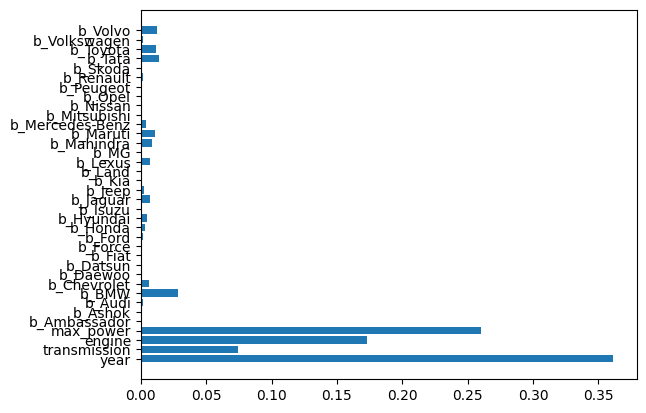

In [93]:
plt.barh(X_train.columns, rf_random.best_estimator_.feature_importances_)

### Export Model for Later Use

In [94]:
import pickle

file_name = './model/rf_random_selling_price.model'
pickle.dump(rf_random, open(file_name, 'wb'))

In [95]:
loaded_model = pickle.load(open(file_name, 'rb'))

In [96]:
X_train

,year,transmission,engine,max_power,b_Ambassador,b_Ashok,b_Audi,b_BMW,b_Chevrolet,b_Daewoo,...,b_Mitsubishi,b_Nissan,b_Opel,b_Peugeot,b_Renault,b_Skoda,b_Tata,b_Toyota,b_Volkswagen,b_Volvo
2982,2016,1,-1.316416,-1.088215,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2430,2013,1,-1.322408,-1.258879,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6294,2009,1,-0.419696,-0.247691,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6255,2018,1,1.439650,1.772125,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4253,1999,1,1.078166,-0.670086,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,2013,1,-0.521551,-0.360046,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5461,2016,1,-0.918983,-0.697393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
865,2015,1,-0.419696,-0.079587,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7701,2019,0,2.054772,3.498682,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
testing = X_test.iloc[2,:]

In [98]:
testing = pd.DataFrame(testing).T
testing

,year,transmission,engine,max_power,b_Ambassador,b_Ashok,b_Audi,b_BMW,b_Chevrolet,b_Daewoo,...,b_Mitsubishi,b_Nissan,b_Opel,b_Peugeot,b_Renault,b_Skoda,b_Tata,b_Toyota,b_Volkswagen,b_Volvo
3069,2015.0,1.0,-0.918983,-0.697393,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
predicted_life_exp = loaded_model.predict(testing)
print(f'Predicted selling price is {np.exp(predicted_life_exp[0])}')

Predicted selling price is 351583.82710927096


In [100]:
y_test.loc[3069]

320000

- From the above diagram, 'year' is very significant to selling_price. This also follow the selling_price vs. year scatterplot that the car price ceiling is increasing by year. Technology introducing in modern car can be the reason since it gets outdated fast and made the older car price plummets.
- 'max_power' and 'engine' represent car performance so it has significant effects on selling_price. Also, the 'max_power' and 'engine' (and possibly 'seats') can imply workload or type of car (micro, sedan, SUV, sports car, truck, etc.) which affects heavily on car pricing. If the car name/model is translated into the car type during feature engineering, it might create another important feature.
- Brand is important. This might not be obvious from the feature importance diagram but the boxplot depicts this very well. An attempt to reduce the model complexity and encode car brand into origin (Asian/European/US) was made but the model performance is significantly worse.

—————————————————————————————————

- The model selected for training are "Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor". The best performance model is Random-Forest Regressor. The worst is Decision-Tree followed by Linear Regression and SVR.
- Linear Regression and SVR are not good for this problem because they assume linear relationship between features and labels while the selling_price is influenced both linearly and non-linearly. 
- Even though Random-Forest and Decision-Tree are similar. ensemble learning in Random-Forest decreases the prone of overfitting and improve generalization. Decision-Tree also suffers from outliers because of the lack of ensemble.
- KNeighbors performance takes effect from scaling. A better scaling of features might improve KNeighbors performance.